# Assignment 8 - Pandas III

This assignment will require the database of restaurane grades that can be downloaded from:

https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/xx67-kt59

__Question 1.__ (1.5 points) Import the dataset into a pandas DataFrame. You will need to clean up the data, for example, by removing all entries that have invalid grades (in the ‘GRADE’ column). Print the number of rows that was removed by the cleaning process.

In [29]:
# Solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("nycdt.csv")
data.GRADE.value_counts()

A                 154720
B                  27479
C                   6924
Z                   4101
Not Yet Graded      2135
P                   1584
Name: GRADE, dtype: int64

In [30]:
filt = pd.isnull(data["GRADE"])
print("the number of rows that was removed:", sum(filt))

the number of rows that was removed: 200624


In [31]:
data = data[-filt]

In [32]:
print("the number of rows left:",data.shape[0])

the number of rows left: 196943


__Question 2.__ (3.0 points) Write a function called <font color=blue>Group_Years</font> which receives the cleaned dataframe as a parameter and returns an object with restaurantes grouped by years according to the column 'GRADE DATE'. Print the names of the groups (which correspond to the years).<br><br>
__Hint:__ Use the <font color=blue>dateutil</font> package to parser the column 'GRADE DATE' as a date type and the method <font color=blue>dt</font> available in the DataFrame class to get the year.

In [33]:
# Solution
import dateutil

def Group_Years(data):
    data["GRADE DATE"] = pd.to_datetime(data['GRADE DATE'])
    data.loc[:, 'year'] = data['GRADE DATE'].dt.year
    for name, group in data.groupby('year'):  
        print(int(name))
    return data.groupby("year")
datagb = Group_Years(data)


2012
2013
2014
2015
2016
2017


__Question 3.__ (3.0 points) Write a function called <font color=blue>Restaurant_Grades</font> which receives a given a year as a parameter and returns the number of restaurants graded as 'A', 'B', and 'C' in that particular year. Print out the number of restaurants in each grade for all years in the dataset. Format your print as below:
```
2014
A :  23005
B :  5171
C :  1380
2015
A :  43943
B :  8803
C :  1983
```


In [34]:
subd = data[data.year == 2015]
gd = pd.DataFrame(subd.groupby('GRADE')['GRADE'].count())
gd

,GRADE
GRADE,
A,44158
B,8795
C,1990
P,424
Z,4


In [35]:
def Restaurant_Grades(yg,year):
    subd = yg[yg.year == year]
    gd = pd.DataFrame(subd.groupby('GRADE')['GRADE'].count())
    print(year)
    for i in range(3):
        print(gd.index[i]," : ",gd.GRADE[i])

Restaurant_Grades(data,2014)
Restaurant_Grades(data,2015)

2014
A  :  22458
B  :  4958
C  :  1319
2015
A  :  44158
B  :  8795
C  :  1990


__Question 4.__ (2.5 points) Generate the following plots:
1. NYC: bar plot comparing the grades, over time, for all the instances in the dataset.
2. Brooklyn: bar plot comparing the grades of Brooklyn's restaurants over time.
3. Manhattan: bar plot comparing the grades of Manhattan's restaurants over time.<br>

Based on the plots, can you claim the quality of the restaurants are improving over years?

In [69]:
# Solution
# import matplotlib.pyplot as plt
subA = pd.DataFrame(data.loc[data.GRADE == "A"].groupby("year")["GRADE"].count())
subB = pd.DataFrame(data.loc[data.GRADE == "B"].groupby("year")["GRADE"].count())
subC = pd.DataFrame(data.loc[data.GRADE == "C"].groupby("year")["GRADE"].count())

In [70]:
subAB = pd.merge(subA, subB, right_index=True, left_index=True, how = "outer")

In [71]:
subABC = pd.merge(subAB, subC, right_index=True, left_index=True, how = "outer")

In [72]:
subABC.rename(columns={'GRADE_x': 'A', 'GRADE_y': 'B', 'GRADE':'C'}, inplace=True)

In [73]:
subABC = subABC.fillna(0)

In [74]:
subABC

,A,B,C
year,,,
2012.0,3,0.0,0.0
2013.0,1110,241.0,51.0
2014.0,22458,4958.0,1319.0
2015.0,44158,8795.0,1990.0
2016.0,46586,7991.0,2065.0
2017.0,40404,5494.0,1499.0


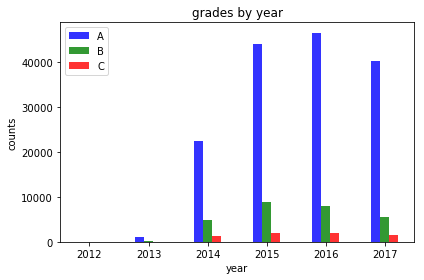

In [81]:
n_groups = 6
# means_frank = (90, 55, 40, 65)
# means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, subABC.A, bar_width,
                 alpha=opacity,
                 color='b',
                 label='A')
 
rects2 = plt.bar(index + bar_width, subABC.B, bar_width,
                 alpha=opacity,
                 color='g',
                 label='B')
rects3 = plt.bar(index + bar_width * 2, subABC.C, bar_width,
                 alpha=opacity,
                 color='r',
                 label='C')
 
plt.xlabel('year')
plt.ylabel('counts')
plt.title('grades by year')
plt.xticks((index + bar_width), (2012,2013,2014,2015,2016,2017))
plt.legend()
 
plt.tight_layout()
plt.show()

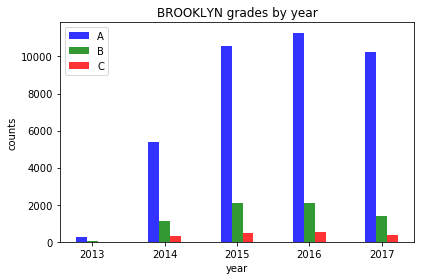

In [91]:
bkdata = data.loc[data.BORO == "BROOKLYN"]
subA = pd.DataFrame(bkdata.loc[bkdata.GRADE == "A"].groupby("year")["GRADE"].count())
subB = pd.DataFrame(bkdata.loc[bkdata.GRADE == "B"].groupby("year")["GRADE"].count())
subC = pd.DataFrame(bkdata.loc[bkdata.GRADE == "C"].groupby("year")["GRADE"].count())
subAB = pd.merge(subA, subB, right_index=True, left_index=True, how = "outer")
subABC = pd.merge(subAB, subC, right_index=True, left_index=True, how = "outer")
subABC.rename(columns={'GRADE_x': 'A', 'GRADE_y': 'B', 'GRADE':'C'}, inplace=True)
subABC = subABC.fillna(0)
n_groups = 5

# create plot
fig2, ax2 = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, subABC.A, bar_width,
                 alpha=opacity,
                 color='b',
                 label='A')
 
rects2 = plt.bar(index + bar_width, subABC.B, bar_width,
                 alpha=opacity,
                 color='g',
                 label='B')
rects3 = plt.bar(index + bar_width * 2, subABC.C, bar_width,
                 alpha=opacity,
                 color='r',
                 label='C')
 
plt.xlabel('year')
plt.ylabel('counts')
plt.title('BROOKLYN grades by year')
plt.xticks((index + bar_width), (2013,2014,2015,2016,2017))
plt.legend()
 
plt.tight_layout()
plt.show()

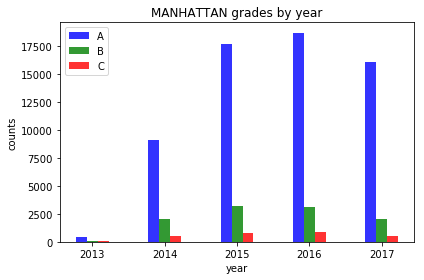

In [90]:
mhdata = data.loc[data.BORO == "MANHATTAN"]
subA = pd.DataFrame(mhdata.loc[mhdata.GRADE == "A"].groupby("year")["GRADE"].count())
subB = pd.DataFrame(mhdata.loc[mhdata.GRADE == "B"].groupby("year")["GRADE"].count())
subC = pd.DataFrame(mhdata.loc[mhdata.GRADE == "C"].groupby("year")["GRADE"].count())
subAB = pd.merge(subA, subB, right_index=True, left_index=True, how = "outer")
subABC = pd.merge(subAB, subC, right_index=True, left_index=True, how = "outer")
subABC.rename(columns={'GRADE_x': 'A', 'GRADE_y': 'B', 'GRADE':'C'}, inplace=True)
subABC = subABC.fillna(0)
n_groups = 5

# create plot
fig3, ax3 = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, subABC.A, bar_width,
                 alpha=opacity,
                 color='b',
                 label='A')
 
rects2 = plt.bar(index + bar_width, subABC.B, bar_width,
                 alpha=opacity,
                 color='g',
                 label='B')
rects3 = plt.bar(index + bar_width * 2, subABC.C, bar_width,
                 alpha=opacity,
                 color='r',
                 label='C')
 
plt.xlabel('year')
plt.ylabel('counts')
plt.title('MANHATTAN grades by year')
plt.xticks((index + bar_width), (2013,2014,2015,2016,2017))
plt.legend()
 
plt.tight_layout()
plt.show()